In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
##Loading Data (Housing Dataset) from local storage
raw_data = pd.read_csv("C:\\Users\\adity\\Projects\\aiml\\mljorney\\week1\\Housing.csv")

In [12]:
raw_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [13]:
raw_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [15]:
raw_data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [16]:
raw_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [21]:
num_columns = raw_data.select_dtypes(include='int64').columns.tolist()
num_columns

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [23]:
cat_columns = [col for col in raw_data.columns if col not in num_columns]
cat_columns

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

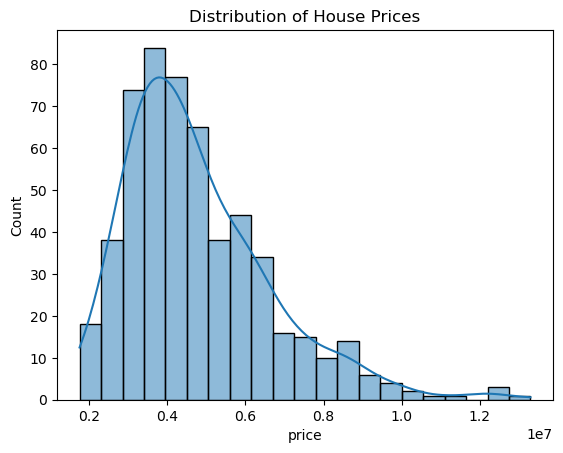

In [25]:
sns.histplot(raw_data['price'], kde=True)
plt.title("Distribution of House Prices")
plt.show()

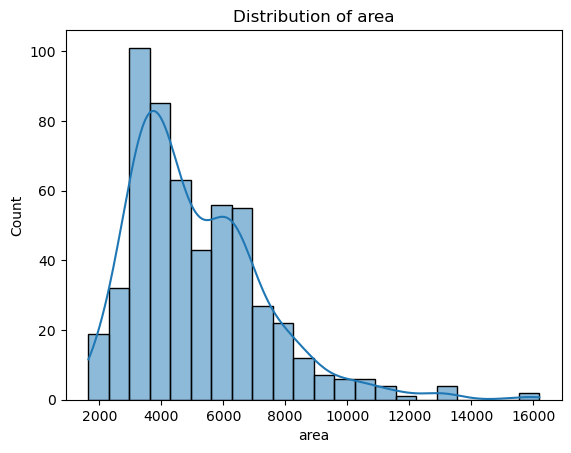

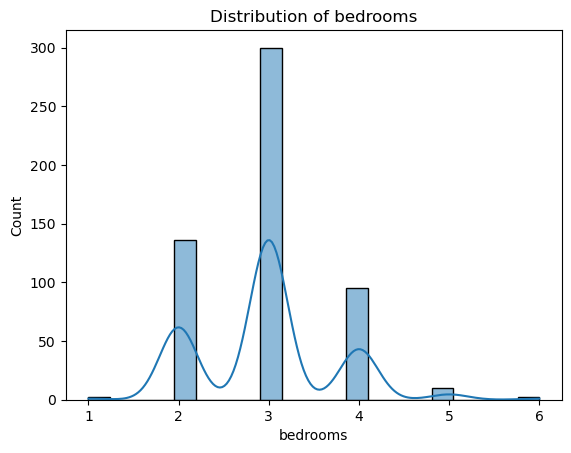

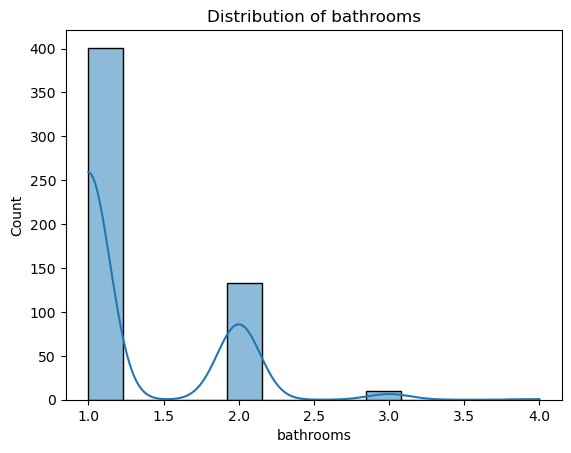

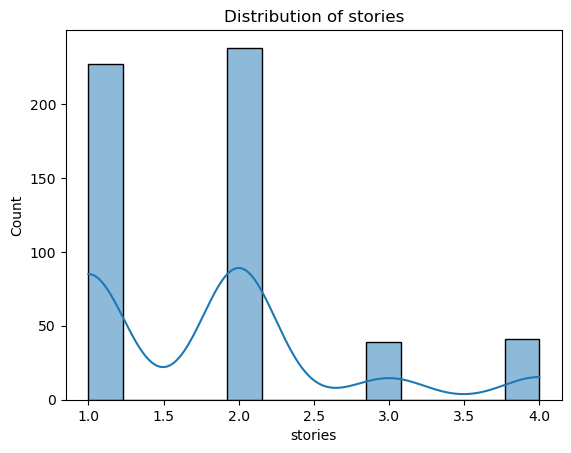

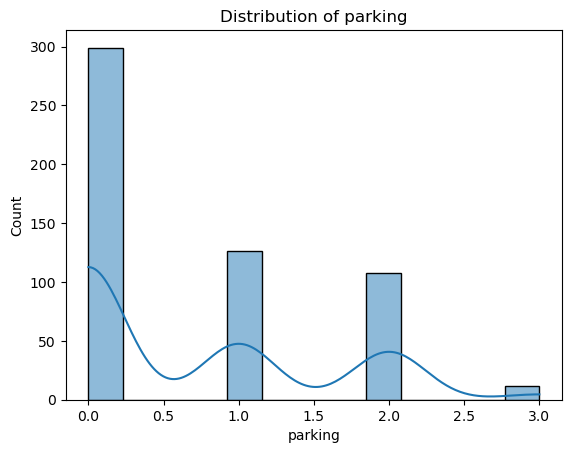

In [26]:
for col in ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']:
    sns.histplot(raw_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

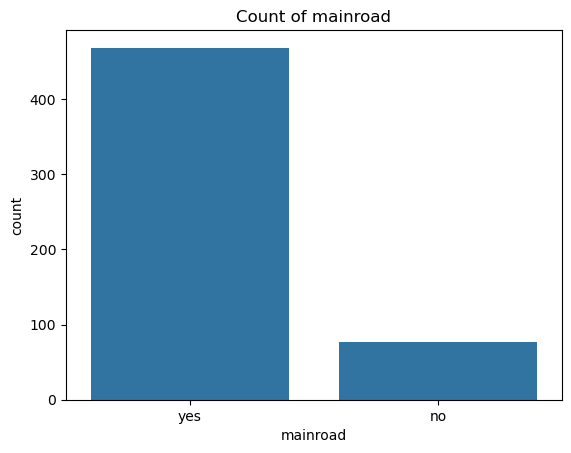

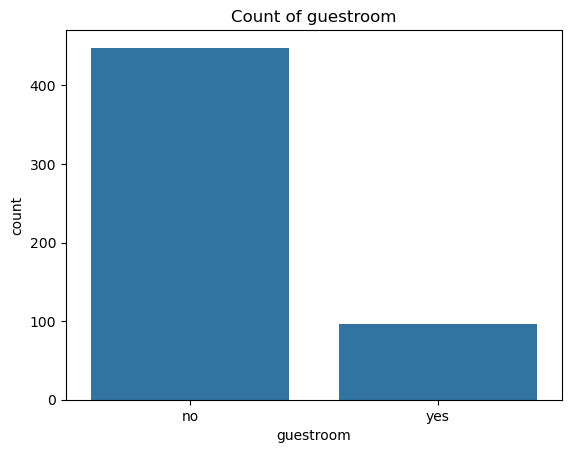

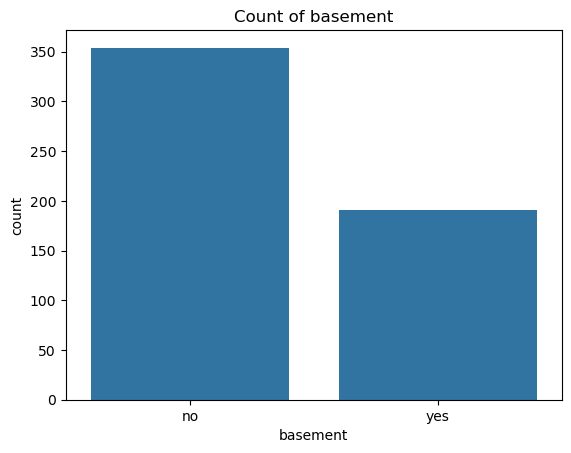

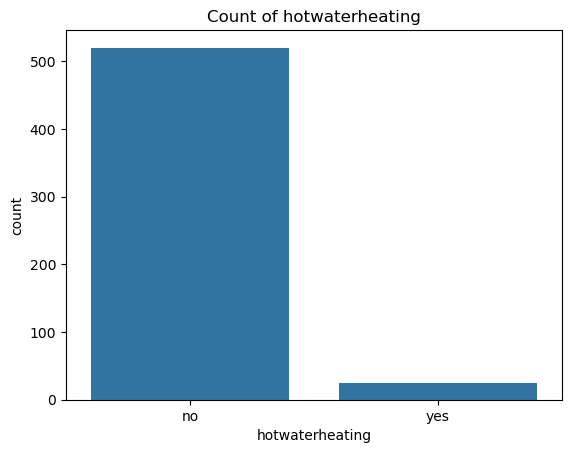

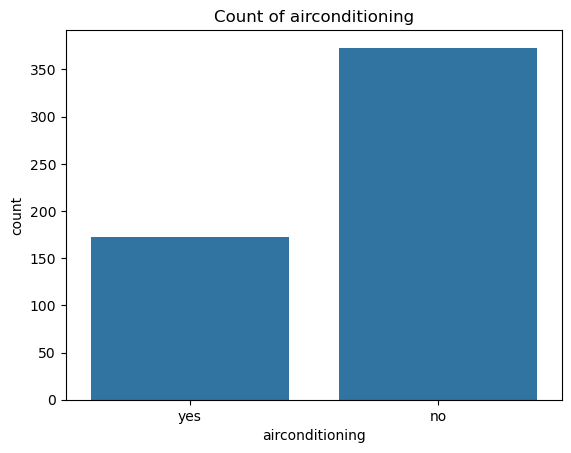

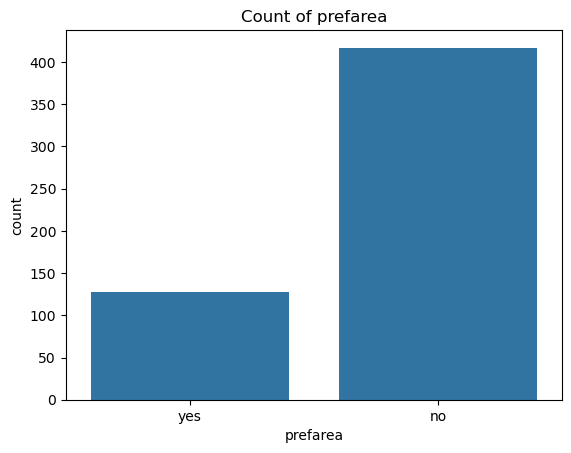

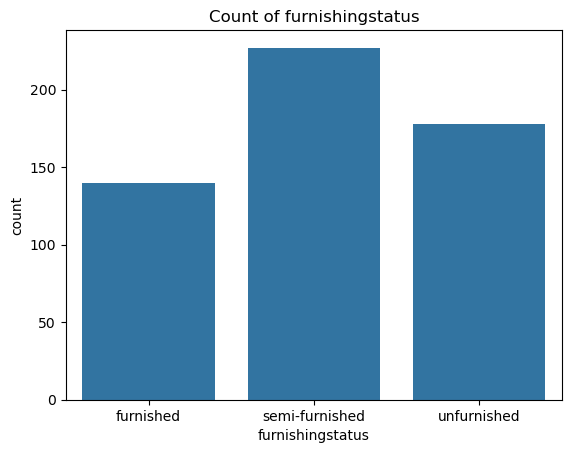

In [27]:
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
            'airconditioning', 'prefarea', 'furnishingstatus']:
    sns.countplot(x=col, data=raw_data)
    plt.title(f"Count of {col}")
    plt.show()

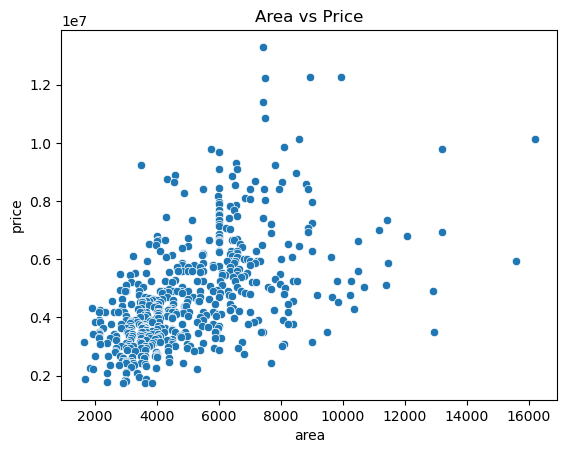

In [28]:
sns.scatterplot(x='area', y='price', data=raw_data)
plt.title("Area vs Price")
plt.show()

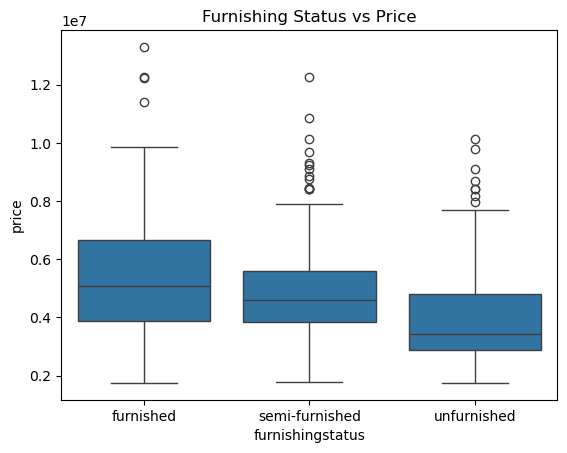

In [29]:
sns.boxplot(x='furnishingstatus', y='price', data=raw_data)
plt.title("Furnishing Status vs Price")
plt.show()

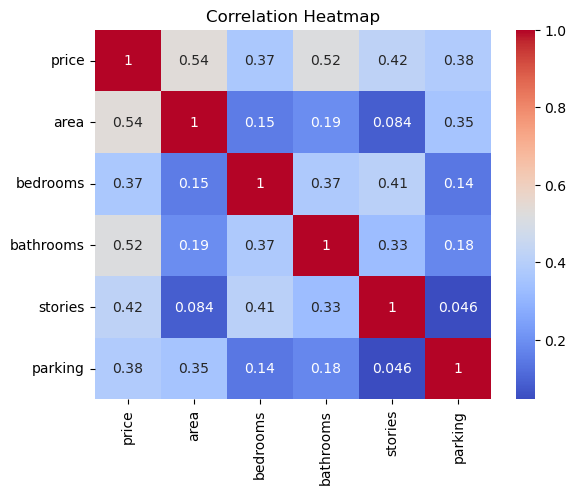

In [30]:
corr = raw_data[['price','area','bedrooms','bathrooms','stories','parking']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

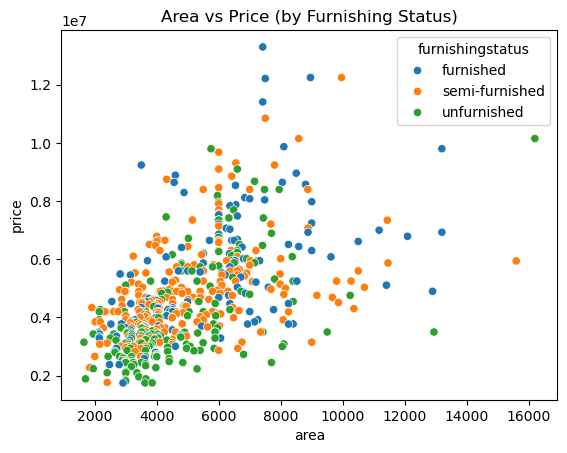

In [32]:
sns.scatterplot(x='area', y='price', hue='furnishingstatus', data=raw_data)
plt.title("Area vs Price (by Furnishing Status)")
plt.show()

<Axes: xlabel='furnishingstatus', ylabel='count'>

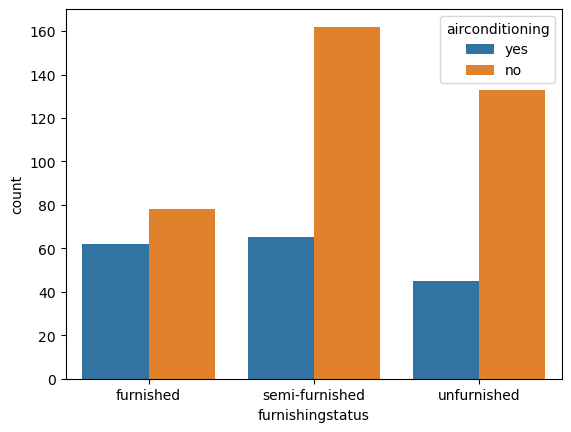

In [37]:
sns.countplot(x='furnishingstatus', hue='airconditioning', data=raw_data)


In [38]:
raw_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [41]:
for col in cat_columns:
    print(f"{col} : {raw_data[col].unique()}")

mainroad : ['yes' 'no']
guestroom : ['no' 'yes']
basement : ['no' 'yes']
hotwaterheating : ['no' 'yes']
airconditioning : ['yes' 'no']
prefarea : ['yes' 'no']
furnishingstatus : ['furnished' 'semi-furnished' 'unfurnished']


In [43]:
data_cleaned = pd.get_dummies(raw_data, columns=cat_columns, drop_first=True)
data_cleaned.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [44]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    bool 
 7   guestroom_yes                    545 non-null    bool 
 8   basement_yes                     545 non-null    bool 
 9   hotwaterheating_yes              545 non-null    bool 
 10  airconditioning_yes              545 non-null    bool 
 11  prefarea_yes                     545 non-null    bool 
 12  furnishingstatus_semi-furnished  545 non-null    b

In [45]:
bool_cols = data_cleaned.select_dtypes(include='bool').columns.tolist()
bool_cols

['mainroad_yes',
 'guestroom_yes',
 'basement_yes',
 'hotwaterheating_yes',
 'airconditioning_yes',
 'prefarea_yes',
 'furnishingstatus_semi-furnished',
 'furnishingstatus_unfurnished']

In [47]:
data_cleaned[bool_cols] = data_cleaned[bool_cols].astype(int)
data_cleaned.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [49]:
'''Separate data for training'''
X = data_cleaned.drop('price',axis=1)
y = data_cleaned.price
print(X)
print(y)

     area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
0    7420         4          2        3        2             1              0   
1    8960         4          4        4        3             1              0   
2    9960         3          2        2        2             1              0   
3    7500         4          2        2        3             1              0   
4    7420         4          1        2        2             1              1   
..    ...       ...        ...      ...      ...           ...            ...   
540  3000         2          1        1        2             1              0   
541  2400         3          1        1        0             0              0   
542  3620         2          1        1        0             1              0   
543  2910         3          1        1        0             0              0   
544  3850         3          1        2        0             1              0   

     basement_yes  hotwater

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (Optional) Scaling - needed for SVR, not trees
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

     area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
46   6000         3          2        4        1             1              0   
93   7200         3          2        1        3             1              0   
335  3816         2          1        1        2             1              0   
412  2610         3          1        2        0             1              0   
471  3750         3          1        2        0             1              0   
..    ...       ...        ...      ...      ...           ...            ...   
71   6000         4          2        4        0             1              0   
106  5450         4          2        1        0             1              0   
270  4500         3          2        3        1             1              0   
435  4040         2          1        1        0             1              0   
102  5500         3          2        4        1             1              1   

     basement_yes  hotwater

In [53]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [55]:
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

SVR()

In [56]:
dtree_model = DecisionTreeRegressor()
dtree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [58]:
#Predictions
y_pred_lin = lin_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test_scaled)
y_pred_dt = dtree_model.predict(X_test)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [62]:
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

In [66]:
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [65]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [68]:
header_list = ['Algo Name', 'Mean Avg Error','Mean Sqrd Error', 'Root MS', 'R2 Score']
linr_results = ['Linear_regression']
svr_result = ['SVR_Regresson']
dt_result = ['DT_regression']


In [72]:
linr_results.append([mae_lin, mse_lin, rmse_lin, r2_lin])
svr_result.append([mae_svr, mse_svr, rmse_svr, r2_svr])
dt_result.append([mae_dt, mse_dt, rmse_dt, r2_dt])



In [73]:
print(header_list)
print(linr_results)
print(svr_result)
print(dt_result)

['Algo Name', 'Mean Avg Error', 'Mean Sqrd Error', 'Root MS', 'R2 Score']
['Linear_regression', [970043.403920164, 1754318687330.6643, np.float64(1324506.9600914388), 0.6529242642153184], [970043.403920164, 1754318687330.6643, np.float64(1324506.9600914388), 0.6529242642153184], [970043.403920164, 1754318687330.6643, np.float64(1324506.9600914388), 0.6529242642153184]]
['SVR_Regresson', [1763890.296258186, 5567945098062.217, np.float64(2359649.3591341525), -0.10156646889460341]]
['DT_regression', [1246642.2018348624, 2824017899082.569, np.float64(1680481.4485981595), 0.4412941632146854]]


In [74]:
result_final = [
                [header_list,
                linr_results,
                svr_result,
                dt_result]
               ]

In [75]:
print(result_final)

[[['Algo Name', 'Mean Avg Error', 'Mean Sqrd Error', 'Root MS', 'R2 Score'], ['Linear_regression', [970043.403920164, 1754318687330.6643, np.float64(1324506.9600914388), 0.6529242642153184], [970043.403920164, 1754318687330.6643, np.float64(1324506.9600914388), 0.6529242642153184], [970043.403920164, 1754318687330.6643, np.float64(1324506.9600914388), 0.6529242642153184]], ['SVR_Regresson', [1763890.296258186, 5567945098062.217, np.float64(2359649.3591341525), -0.10156646889460341]], ['DT_regression', [1246642.2018348624, 2824017899082.569, np.float64(1680481.4485981595), 0.4412941632146854]]]]


In [77]:
import pandas as pd
import numpy as np

def compare_regression_models(models_metrics):
    """
    Compare multiple regression models given their metrics.
    
    Parameters:
    models_metrics : dict
        Keys = model names
        Values = list of metrics [MAE, MSE, RMSE, R2]
    
    Example input:
    models_metrics = {
        "Linear Regression": [970043, 1.75e12, 1324506, 0.6529],
        "SVR Regression": [1763890, 5.56e12, 2359649, -0.1016],
        "Decision Tree": [1246642, 2.82e12, 1680481, 0.4413]
    }
    """
    
    # Build DataFrame
    df = pd.DataFrame.from_dict(models_metrics, orient='index',
                                columns=['MAE', 'MSE', 'RMSE', 'R2 Score'])
    
    # Highlight best models
    best_mae = df['MAE'].idxmin()
    best_rmse = df['RMSE'].idxmin()
    best_r2 = df['R2 Score'].idxmax()
    
    print("=== Regression Models Comparison ===\n")
    print(df, "\n")
    
    print("✅ Best MAE:", best_mae)
    print("✅ Best RMSE:", best_rmse)
    print("✅ Best R² Score:", best_r2, "\n")
    
    # Interpretation
    print("=== Interpretation ===")
    for model, row in df.iterrows():
        print(f"\nModel: {model}")
        print(f" - MAE = {row['MAE']:.2f} → Average prediction error")
        print(f" - RMSE = {row['RMSE']:.2f} → Typical prediction error (sensitive to large errors)")
        print(f" - R² = {row['R2 Score']:.3f} → Fraction of variance explained")
        if row['R2 Score'] < 0:
            print(" ⚠ R² < 0 → Model performs worse than predicting the mean")
        elif row['R2 Score'] < 0.5:
            print(" ⚠ R² < 0.5 → Model explains less than half the variance; moderate/weak fit")
        elif row['R2 Score'] < 0.7:
            print(" ℹ R² between 0.5-0.7 → Decent fit")
        else:
            print(" ✅ R² > 0.7 → Good fit")


In [79]:
models_metrics = {
    "Linear Regression": [mae_lin, mse_lin, rmse_lin, r2_lin],
    "SVR Regression": [mae_svr, mse_svr, rmse_svr, r2_svr],
    "Decision Tree": [mae_dt, mse_dt, rmse_dt, r2_dt]
}

compare_regression_models(models_metrics)

=== Regression Models Comparison ===

                            MAE           MSE          RMSE  R2 Score
Linear Regression  9.700434e+05  1.754319e+12  1.324507e+06  0.652924
SVR Regression     1.763890e+06  5.567945e+12  2.359649e+06 -0.101566
Decision Tree      1.246642e+06  2.824018e+12  1.680481e+06  0.441294 

✅ Best MAE: Linear Regression
✅ Best RMSE: Linear Regression
✅ Best R² Score: Linear Regression 

=== Interpretation ===

Model: Linear Regression
 - MAE = 970043.40 → Average prediction error
 - RMSE = 1324506.96 → Typical prediction error (sensitive to large errors)
 - R² = 0.653 → Fraction of variance explained
 ℹ R² between 0.5-0.7 → Decent fit

Model: SVR Regression
 - MAE = 1763890.30 → Average prediction error
 - RMSE = 2359649.36 → Typical prediction error (sensitive to large errors)
 - R² = -0.102 → Fraction of variance explained
 ⚠ R² < 0 → Model performs worse than predicting the mean

Model: Decision Tree
 - MAE = 1246642.20 → Average prediction error
 - RMSE 